Importing Data

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Loading data

In [2]:
purchase_prices = pd.read_csv("D:\\movies\\projects\\Alfido Tech\\task3\\2017PurchasePricesDec.csv")
beg_inv = pd.read_csv("D:\\movies\\projects\\Alfido Tech\\task3\\BegInvFINAL12312016.csv")
end_inv = pd.read_csv("D:\\movies\\projects\\Alfido Tech\\task3\\EndInvFINAL12312016.csv")
invoice_purchases = pd.read_csv("D:\\movies\\projects\\Alfido Tech\\task3\\InvoicePurchases12312016.csv")
purchases = pd.read_csv("D:\\movies\\projects\\Alfido Tech\\task3\\PurchasesFINAL12312016.csv")
sales = pd.read_csv("D:\\movies\\projects\\Alfido Tech\\task3\\SalesFINAL12312016.csv")

In [3]:
print("purchase_prices Columns:")
print(purchase_prices.columns.tolist())

print("\nbeg_inv Columns:")
print(beg_inv.columns.tolist())

print("\nend_inv Columns:")
print(end_inv.columns.tolist())

print("\ninvoice_purchases Columns:")
print(invoice_purchases.columns.tolist())

print("\npurchases Columns:")
print(purchases.columns.tolist())

print("\nsales Columns:")
print(sales.columns.tolist())

purchase_prices Columns:
['Brand', 'Description', 'Price', 'Size', 'Volume', 'Classification', 'PurchasePrice', 'VendorNumber', 'VendorName']

beg_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'startDate']

end_inv Columns:
['InventoryId', 'Store', 'City', 'Brand', 'Description', 'Size', 'onHand', 'Price', 'endDate']

invoice_purchases Columns:
['VendorNumber', 'VendorName', 'InvoiceDate', 'PONumber', 'PODate', 'PayDate', 'Quantity', 'Dollars', 'Freight', 'Approval']

purchases Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'VendorNumber', 'VendorName', 'PONumber', 'PODate', 'ReceivingDate', 'InvoiceDate', 'PayDate', 'PurchasePrice', 'Quantity', 'Dollars', 'Classification']

sales Columns:
['InventoryId', 'Store', 'Brand', 'Description', 'Size', 'SalesQuantity', 'SalesDollars', 'SalesPrice', 'SalesDate', 'Volume', 'Classification', 'ExciseTax', 'VendorNo', 'VendorName']


Data Cleaning and Preprocessing

In [4]:
# Checking for missing values in each dataset
print("Missing Values in Purchase Prices:")
print(purchase_prices.isnull().sum())

print("\nMissing Values in Beginning Inventory:")
print(beg_inv.isnull().sum())

print("\nMissing Values in Ending Inventory:")
print(end_inv.isnull().sum())

print("\nMissing Values in Invoice Purchases:")
print(invoice_purchases.isnull().sum())

print("\nMissing Values in Purchases:")
print(purchases.isnull().sum())

print("\nMissing Values in Sales:")
print(sales.isnull().sum())

Missing Values in Purchase Prices:
Brand             0
Description       1
Price             0
Size              1
Volume            1
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

Missing Values in Beginning Inventory:
InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

Missing Values in Ending Inventory:
InventoryId       0
Store             0
City           1284
Brand             0
Description       0
Size              0
onHand            0
Price             0
endDate           0
dtype: int64

Missing Values in Invoice Purchases:
VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64

Missing Values in Purchases:
InventoryId       0
Store             0
Brand             0
Description    

In [5]:
# Purchase Prices
# Droping rows with missing values for 'Description' and 'Size'
purchase_prices.dropna(subset=['Description', 'Size'], inplace=True)

# Ending Inventory
# Filling missing values in 'City' with a placeholder (e.g., 'Unknown')
end_inv['City'].fillna('Unknown', inplace=True)

# Purchases
# Droping rows with missing values for 'Size'
purchases.dropna(subset=['Size'], inplace=True)

In [6]:
# Displaying information about the dataset after handling null values

print("Missing Values in Purchase Prices:")
print(purchase_prices.isnull().sum())

print("\nMissing Values in Beginning Inventory:")
print(beg_inv.isnull().sum())

print("\nMissing Values in Ending Inventory:")
print(end_inv.isnull().sum())

print("\nMissing Values in Invoice Purchases:")
print(invoice_purchases.isnull().sum())

print("\nMissing Values in Purchases:")
print(purchases.isnull().sum())

print("\nMissing Values in Sales:")
print(sales.isnull().sum())

Missing Values in Purchase Prices:
Brand             0
Description       0
Price             0
Size              0
Volume            0
Classification    0
PurchasePrice     0
VendorNumber      0
VendorName        0
dtype: int64

Missing Values in Beginning Inventory:
InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
startDate      0
dtype: int64

Missing Values in Ending Inventory:
InventoryId    0
Store          0
City           0
Brand          0
Description    0
Size           0
onHand         0
Price          0
endDate        0
dtype: int64

Missing Values in Invoice Purchases:
VendorNumber    0
VendorName      0
InvoiceDate     0
PONumber        0
PODate          0
PayDate         0
Quantity        0
Dollars         0
Freight         0
Approval        0
dtype: int64

Missing Values in Purchases:
InventoryId       0
Store             0
Brand             0
Description       0
Size              0
Ve

EDA

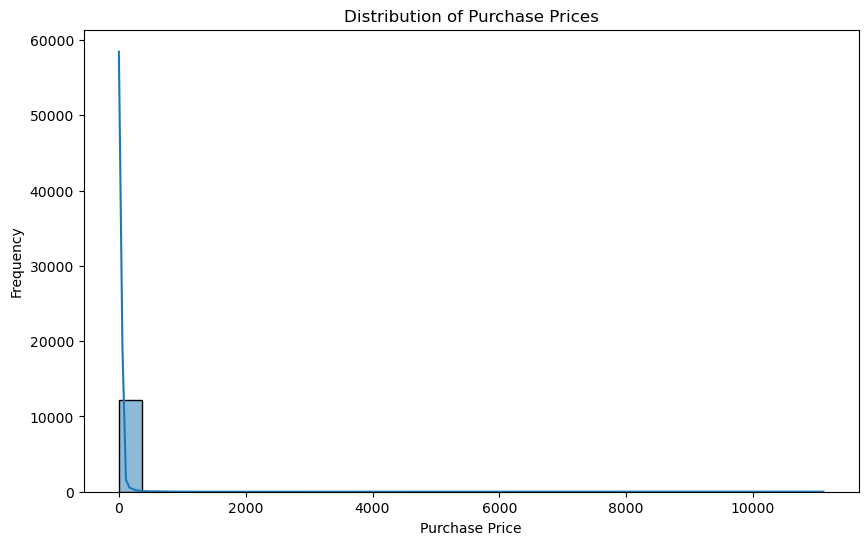

In [7]:
# Visualizing distribution of 'PurchasePrice' in Purchase Prices
plt.figure(figsize=(10, 6))
sns.histplot(purchase_prices['PurchasePrice'], bins=30, kde=True)
plt.title('Distribution of Purchase Prices')
plt.xlabel('Purchase Price')
plt.ylabel('Frequency')
plt.show()

Inventory Metrics Calculation

In [11]:
total_quantity_purchased = purchases['Quantity'].sum()
average_inventory_level = (beg_inv['onHand'] + end_inv['onHand']) / 2

inventory_turnover = total_quantity_purchased / average_inventory_level.sum()  # Selecting the sum of the Series

print(f"Total Quantity Purchased: {total_quantity_purchased}")
print(f"Average Inventory Level: {average_inventory_level.sum()}")
print(f"Inventory Turnover: {inventory_turnover:.2f}")

Total Quantity Purchased: 33584363
Average Inventory Level: 4335481.5
Inventory Turnover: 7.75


Visualizations

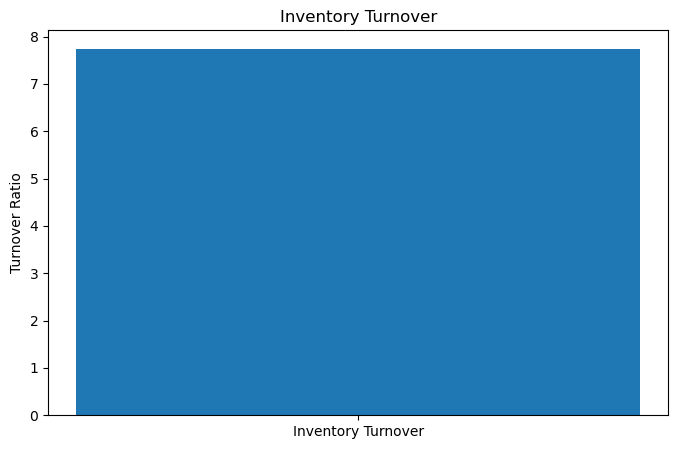

In [12]:
plt.figure(figsize=(8, 5))
plt.bar(['Inventory Turnover'], [inventory_turnover])
plt.title('Inventory Turnover')
plt.ylabel('Turnover Ratio')
plt.show()

Optimization Analysis

In [13]:
# Identifying slow-moving items with low sales
threshold_value = 10  # Set your threshold value
slow_moving_items = sales[sales['SalesQuantity'] < threshold_value]

# Displaying slow-moving items
print("Slow-Moving Items:")
print(slow_moving_items[['InventoryId', 'Description', 'SalesQuantity']])

Slow-Moving Items:
                 InventoryId                 Description  SalesQuantity
0        1_HARDERSFIELD_1004  Jim Beam w/2 Rocks Glasses              1
1        1_HARDERSFIELD_1004  Jim Beam w/2 Rocks Glasses              2
2        1_HARDERSFIELD_1004  Jim Beam w/2 Rocks Glasses              1
3        1_HARDERSFIELD_1004  Jim Beam w/2 Rocks Glasses              1
4        1_HARDERSFIELD_1005     Maker's Mark Combo Pack              2
...                      ...                         ...            ...
1048570  19_WINTERVALE_39384    F Coppola Diamond Pnt Nr              4
1048571  19_WINTERVALE_39384    F Coppola Diamond Pnt Nr              8
1048572  19_WINTERVALE_39384    F Coppola Diamond Pnt Nr              1
1048573  19_WINTERVALE_39384    F Coppola Diamond Pnt Nr              3
1048574  19_WINTERVALE_39384    F Coppola Diamond Pnt Nr              2

[1015228 rows x 3 columns]


Vendor Analysis

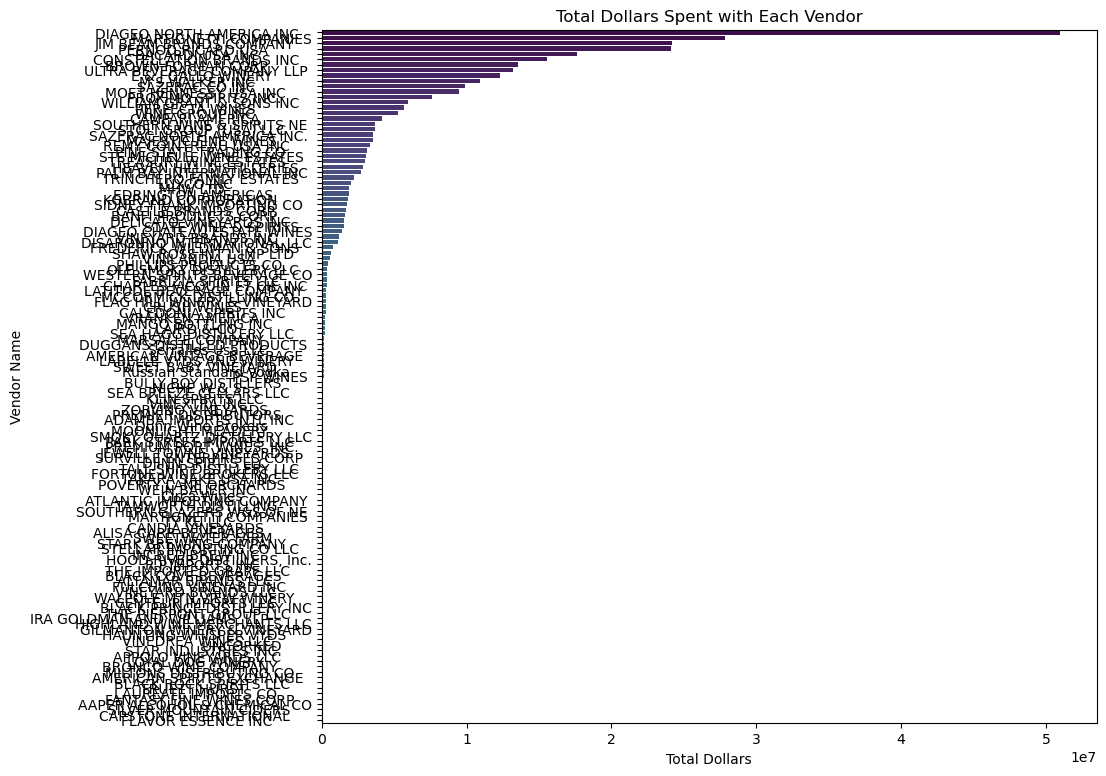

In [18]:
# Visualizing total dollars spent with each vendor
vendor_total_dollars = purchases.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False)

plt.figure(figsize=(10, 9))
sns.barplot(x=vendor_total_dollars.values, y=vendor_total_dollars.index, palette='viridis')
plt.title('Total Dollars Spent with Each Vendor')
plt.xlabel('Total Dollars')
plt.ylabel('Vendor Name')
plt.show()

Decision Support

In [20]:
# Hypothetical function to calculate optimal inventory level
def calculate_optimal_inventory_level(current_inventory, desired_coverage):
    # Implement your logic here
    return current_inventory * desired_coverage

# Assuming to have the current_inventory_level and desired_coverage
current_inventory_level = 1000
desired_coverage = 1.5  # Example: Aim for 1.5 times the current inventory level

# Calculating optimal inventory level
optimal_inventory_level = calculate_optimal_inventory_level(current_inventory_level, desired_coverage)

# Decision support based on optimal inventory level
if current_inventory_level < optimal_inventory_level:
    print("Recommendation: Increase inventory levels for better coverage.")
else:
    print("Recommendation: Maintain current inventory levels.")


Recommendation: Increase inventory levels for better coverage.


In [23]:
# Assuming you have calculated vendor_total_dollars
vendor_total_dollars = purchases.groupby('VendorName')['Dollars'].sum().sort_values(ascending=False)

# Hypothetical function to calculate vendor performance score
def calculate_vendor_performance_score(vendor):
    hypothetical_score = 90  # Replacing with actual calculation
    return hypothetical_score

# Calculating vendor performance scores
vendor_performance_scores = {vendor: calculate_vendor_performance_score(vendor) for vendor in vendor_total_dollars.index}

# Assuming you have a threshold score
threshold_score = 80  # Example: Define your threshold score

# Identifying the top-performing vendor
top_vendor = max(vendor_performance_scores, key=vendor_performance_scores.get)

# Decision support based on vendor performance
if vendor_performance_scores[top_vendor] > threshold_score:
    print(f"Recommendation: Continue a strong partnership with {top_vendor}.")
else:
    print(f"Recommendation: Evaluate the vendor relationship with {top_vendor}.")


Recommendation: Continue a strong partnership with DIAGEO NORTH AMERICA INC   .
